In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [3]:
from utils.preprocess_finder import finder

In [4]:
test_dataset_path = '/media/dh/Data/AI_Camp/TIL2019_v0.1/test'
model_path = '/home/dh/Workspace/aicamp/models/xception/xception_acc.hdf5'

In [5]:
assert model_path.endswith('.hdf5')
model_name = os.path.basename(model_path)
context = model_name[:model_name.rfind('_')]
context

'xception'

In [6]:
class_labels = sorted( list(os.listdir(test_dataset_path)) )

In [7]:
class_labels

['ChairPose',
 'ChestBump',
 'ChildPose',
 'Dabbing',
 'EaglePose',
 'HandGun',
 'HandShake',
 'HighKneel',
 'HulkSmash',
 'KoreanHeart',
 'KungfuCrane',
 'KungfuSalute',
 'LeopardCrawl',
 'Salute',
 'Spiderman',
 'WarriorPose']

In [8]:
target_size = (224,224)
batch_size = 32

In [9]:
model = load_model(model_path)

In [10]:
test_gen = ImageDataGenerator(
        preprocessing_function=finder(context),
#         {'preprocessing_function': finder(''), 
#         rescale=1./255
                )
test_gen = test_gen.flow_from_directory(
                                        test_dataset_path, 
                                        target_size = target_size,
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = False,
                                        seed=19
                                        )
print('Test set size: {}'.format(test_gen.n))

----> USING xception native preprocessing
Found 359 images belonging to 16 classes.
Test set size: 359


In [11]:
test_gen.reset()
preds = model.predict_generator(test_gen, steps = test_gen.n//test_gen.batch_size+1, verbose=1)
preds.shape

12/12 [==============================] - 4s 312ms/step


(359, 16)

In [12]:
preds_argmaxed = np.argmax(preds, axis=1)
preds_argmaxed.shape

(359,)

In [13]:
labels = (test_gen.class_indices)
labels = {v: k for k,v in labels.items()}
preds_names = [labels[idx] for idx in preds_argmaxed]

In [14]:
gt_names = [labels[idx] for idx in test_gen.classes]
gt_names

['ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChairPose',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChestBump',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'ChildPose',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Dabbing',
 'Da

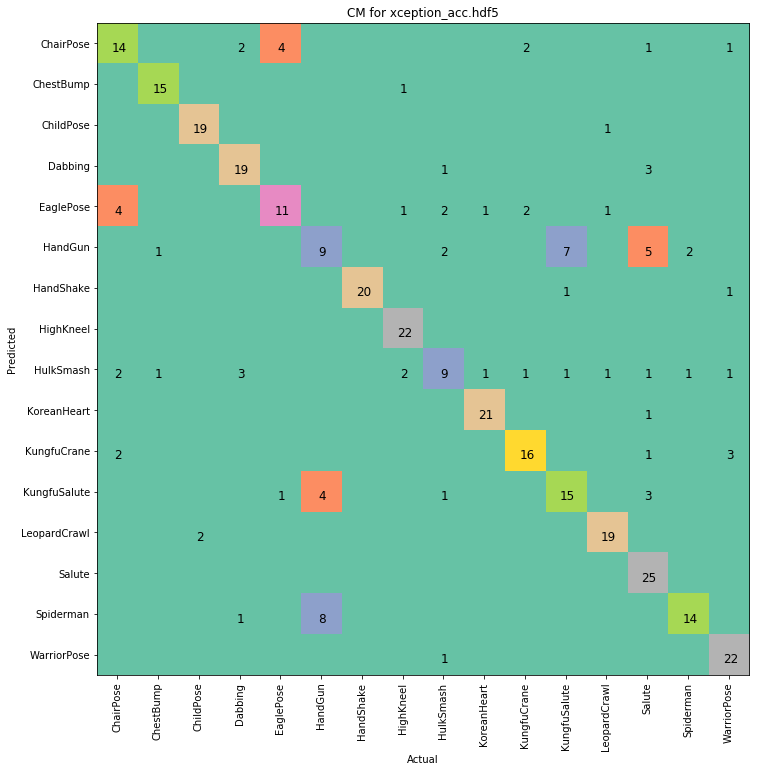

In [15]:
confusion = confusion_matrix(gt_names, preds_names)
NUM_LABELS = test_gen.n
f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.grid(False)
axes.set_xticklabels(class_labels, rotation = 90)
axes.set_yticklabels(class_labels)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
axes.set_title('CM for {}'.format(model_name))
plt.imshow(confusion, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(confusion):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')

In [16]:
print(classification_report(gt_names, preds_names))

              precision    recall  f1-score   support

   ChairPose       0.64      0.58      0.61        24
   ChestBump       0.88      0.94      0.91        16
   ChildPose       0.90      0.95      0.93        20
     Dabbing       0.76      0.83      0.79        23
   EaglePose       0.69      0.50      0.58        22
     HandGun       0.43      0.35      0.38        26
   HandShake       1.00      0.91      0.95        22
   HighKneel       0.85      1.00      0.92        22
   HulkSmash       0.56      0.38      0.45        24
 KoreanHeart       0.91      0.95      0.93        22
 KungfuCrane       0.76      0.73      0.74        22
KungfuSalute       0.62      0.62      0.62        24
LeopardCrawl       0.86      0.90      0.88        21
      Salute       0.62      1.00      0.77        25
   Spiderman       0.82      0.61      0.70        23
 WarriorPose       0.79      0.96      0.86        23

    accuracy                           0.75       359
   macro avg       0.76   

In [35]:
from pprint import pprint
class_report = classification_report(gt_names, preds_names, output_dict=True)
f1_collate = []
for pose in class_labels:
    f1_collate.append((pose, class_report[pose]['f1-score']))
f1_collate.sort(key=lambda x: x[1])
f1_collate.reverse()
f1_collate

[('HandShake', 0.9523809523809523),
 ('KoreanHeart', 0.9333333333333332),
 ('ChildPose', 0.9268292682926829),
 ('HighKneel', 0.9166666666666666),
 ('ChestBump', 0.9090909090909091),
 ('LeopardCrawl', 0.8837209302325582),
 ('WarriorPose', 0.8627450980392156),
 ('Dabbing', 0.7916666666666667),
 ('Salute', 0.7692307692307693),
 ('KungfuCrane', 0.7441860465116279),
 ('Spiderman', 0.7),
 ('KungfuSalute', 0.625),
 ('ChairPose', 0.6086956521739131),
 ('EaglePose', 0.5789473684210527),
 ('HulkSmash', 0.45),
 ('HandGun', 0.3829787234042554)]

In [132]:
test_gen.reset()
model.evaluate_generator(generator=test_gen, steps = test_gen.n//test_gen.batch_size+1, verbose = 1)

12/12 [==============================] - 2s 185ms/step


[1.2490333507620939, 0.7520891364902507]